## 1. La Revolución Statcast

<p><b>Aclaración:</b> El contenido de esta <em>notebook</em> es de autoría y ha sido diseñado por <a href="https://www.linkedin.com/in/davidventuri/">David Venturi</a> - David es Gerente de Currículo en DataCamp. Después de especializarse en Ingeniería Química y Economía, David creó un programa de maestría de ciencia de datos personalizado utilizando recursos en línea. Ha estudiado cientos de cursos en línea y ha creado varios.</p>

<p>Aaron Judge es uno de los jugadores físicamente más grandes en las Grandes Ligas de Béisbol con una altura de 6 pies y 7 pulgadas (2.01 metros) y un peso de 128 kg (282 libras). También golpeó el <a href="https://www.mlb.com/news/aaron-judge-sets-statcast-exit-velocity-record/c-235640846"> <em>home run</em> más duro jamás registrado </a>. Cómo sabemos esto? <strong> Statcast </strong>.</p>

<p>Statcast es un sistema de seguimiento de última generación que utiliza cámaras de alta resolución y equipos de radar para medir la ubicación precisa y el movimiento de pelotas de béisbol y jugadores de béisbol. Introducido en 2015 a los 30 estadios de béisbol de las grandes ligas, los datos de Statcast están revolucionando el juego. Los equipos están participando en una "carrera armamentista" de análisis de datos, contratando analistas a izquierda y derecha en un intento de obtener una ventaja sobre su competencia. Este <a href="https://www.youtube.com/watch?v=9rOKGKhQe8U">video</a> describiendo el sistema es increible.</p>

<p><strong>En este cuaderno </strong>, vamos a discutir, analizar y visualizar los datos de Statcast para comparar al Sr. Judge y otro (extremadamente grande) compañero de equipo suyo. Comencemos cargando los datos en nuestro cuaderno. Hay dos archivos CSV,<code>JUDGE.csv</code> y <code>STANTON.csv</code>, los cuales contienen datos de Statcast para 2015-2017. Usaremos pandas DataFrames para almacenar estos datos. Carguemos también nuestras bibliotecas de visualización de datos, matplotlib y seaborn.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cargar los datos de Aaron Judge
judge = pd.read_csv('DATASETS/JUDGE.csv')

# Cargar los datos de Giancarlo Stanton
stanton = pd.read_csv('DATASETS/STANTON.csv')

In [2]:
judge.head(3)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,...,54.0129,0.0,0.0,0.0,1.0,0.0,0.0,NaN,53,3
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,...,54.1114,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,2
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,...,54.0285,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,1


In [3]:
stanton.head(3)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,SL,2017-10-01,86.4,-1.0592,5.9057,Giancarlo Stanton,519317,527055,strikeout,swinging_strike,...,54.7356,0.0,0.0,0.0,1.0,0.0,0.0,NaN,80,4
1,FF,2017-10-01,98.1,-1.5517,5.7016,Giancarlo Stanton,519317,527055,NaN,foul,...,54.9704,0.0,0.0,NaN,NaN,NaN,NaN,4.0,80,3
2,FT,2017-10-01,97.0,-1.3408,5.6190,Giancarlo Stanton,519317,527055,NaN,foul,...,54.3777,0.0,0.0,NaN,NaN,NaN,NaN,NaN,80,2


## 2. ¿Qué pueden medir Statcast?
<p>La mejor pregunta podría ser, ¿qué no puede medir Statcast?</p>
<blockquote>
  <p>Comenzando con el lanzador, Statcast puede medir puntos de datos simples como la velocidad. Al mismo tiempo, Statcast profundiza mucho más, también mide el punto de liberación y la velocidad de giro de cada lanzamiento.</p>
  <p>Pasando a los bateadores, Statcast es capaz de medir la velocidad de salida, el ángulo de lanzamiento y el vector de la pelota cuando sale del bate. A partir de ahí, Statcast también puede rastrear el tiempo de suspensión y la distancia proyectada que recorre una pelota. </p>
</blockquote>
<p>Inspeccionemos las últimas cinco filas del DataFrame <code>judge</code>. Verás que cada fila representa un lanzamiento lanzado a un bateador. También verá que algunas columnas tienen nombres esotéricos. Si esto no tiene sentido ahora, no te preocupes. Los relevantes se explicarán según sea necesario.</p>

In [4]:
# Mostrar todas las columnas (pandas colapsará algunas columnas si no configuramos esta opción)
pd.set_option('display.max_columns', None)

# Mostrar las últimas 5 filas del archivo de Aaron Judge
display(judge.tail())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


## 3. Aaron Judge y Giancarlo Stanton, bateadores prolíficos
<p>Giancarlo Stanton también es un ser humano muy grande, mide 6 pies y 6 pulgadas de alto y pesa 245 libras. En 2018 era candidato a ser compañero de equipo de Aaron Judge en los Yankees de Nueva York. Son similares en muchos aspectos, uno de ellos es que golpearon muchos <em>home runs</em>. 
Stanton y Judge lideraron el béisbol en <em>home runs</em> en 2017, con <a href="https://www.youtube.com/watch?v=tJ6Bz5P6dg4">59</a> y <a href="https://www.youtube.com/watch?v=Gw3pFHMM9fk">52</a>, respectivamente. Estos son totales excepcionales: el jugador en el tercer "solo" tuvo 45 <em>home runs</em>.</p>
<p>Stanton y Judge también son diferentes en muchos aspectos. Uno es <a href="http://m.mlb.com/glossary/statcast/batted-ball-event">eventos de pelota bateada</a>, que es cualquier bola bateada que produce un resultado. Esto incluye outs, hits y errores. A continuación, encontrará los recuentos de eventos de bolas bateadas para cada jugador en 2017. Las frecuencias de otros eventos son bastante diferentes.</p>

In [5]:
# Todos los eventos de pelota bateada de Aaron Judge en 2017
eventos_judge_2017 = judge[(judge['game_date']>'2016-12-31') & (judge['game_date']<='2017-12-31')]['events']
display(eventos_judge_2017.head())

0    strikeout
1          NaN
2          NaN
3         walk
4          NaN
Name: events, dtype: object

In [6]:
print('Los totales de eventos de pelota bateada de Aaron Judge en 2017:')
print(eventos_judge_2017.value_counts())

Los totales de eventos de pelota bateada de Aaron Judge en 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
intent_walk                   11
force_out                     11
hit_by_pitch                   5
field_error                    4
sac_fly                        4
fielders_choice_out            4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64


In [7]:
# Todos los eventos de pelota bateada de Giancarlo Stanton en 2017
eventos_stanton_2017 = stanton[(stanton['game_date']>'2016-12-31')&(stanton['game_date']<='2017-12-31')]['events']
display(eventos_stanton_2017.head())

0    strikeout
1          NaN
2          NaN
3          NaN
4    field_out
Name: events, dtype: object

In [8]:
print('Los totales de eventos de pelota bateada de Giancarlo Stanton en 2017:')
print(eventos_stanton_2017.value_counts())

Los totales de eventos de pelota bateada de Giancarlo Stanton en 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
grounded_into_double_play     13
intent_walk                   13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly                        3
strikeout_double_play          2
fielders_choice_out            2
pickoff_1b                     1
Name: events, dtype: int64


## 4. Analizando home runs con datos de Statcast

<p>Entonces Judge camina (<code>walk</code>) y golpea más que Stanton. Stanton vuela más que el juez. Pero entremos en sus perfiles de golpe con más detalle. Dos de las métricas de Statcast más innovadoras son el ángulo de lanzamiento y la velocidad de salida:</p>
<ul>
    <li> <a href="http://m.mlb.com/glossary/statcast/launch-angle"> Ángulo de lanzamiento</a>: el ángulo vertical en el que la pelota deja el bate de un jugador.</li>
    <li> <a href="http://m.mlb.com/glossary/statcast/exit-velocity"> Velocidad de salida</a>: la velocidad de la pelota cuando sale del bate.</li>
</ul>
<p>Esta nueva información ha cambiado la forma en que los equipos valoran tanto a los bateadores como a los lanzadores. ¿Por qué? Según el <a href="https://www.washingtonpost.com/graphics/sports/mlb-launch-angles-story/?utm_term=.8d088d31f098">Washington Post</a>:</p>
<blockquote>
  <p>Las bolas golpeadas con un ángulo de lanzamiento alto tienen más probabilidades de resultar en un <em>hit</em>. Los <em>hits</em> lo suficientemente rápidos y en el ángulo correcto, se convierten en <em>home runs</em>.</p>
</blockquote>
<p> Veamos la velocidad de salida frente al ángulo de lanzamiento y centrémonos solo en los <em>home runs</em> (2015-2017). Las dos primeras parcelas muestran puntos de datos. Los segundos dos muestran contornos suavizados para representar la densidad. </p>

In [9]:
# Filtrar para incluir solamente los home runs
hr_judge = judge[judge['events']=='home_run']
hr_stanton = stanton[stanton['events']=='home_run']
display(hr_judge.head())
display(hr_stanton.head())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
8,FT,2017-09-30,93.1,-1.4675,5.3552,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (52) on a fly ball to left ...,R,R,R,NYY,TOR,X,NaN,fly_ball,2,0,2017,-1.4279,0.3261,-0.4320,2.9955,NaN,NaN,NaN,0,4,Bot,56.86,4.52,NaN,NaN,431145.0,NaN,170930_180303,5.7047,-135.4206,-1.0399,-18.6301,26.9148,-28.1807,3.8271,1.6673,484.0,118.3,25.740,92.992,2312.0,6.040,492513,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.4579,0.983,1.951,2.0,1.0,0.0,3.0,6.0,23,3
50,FF,2017-09-28,91.4,-1.2834,6.5190,Aaron Judge,592450,607188,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Aaron Judge homers (51) on a fly ball to right...,R,R,R,NYY,TB,X,NaN,fly_ball,2,2,2017,-0.4642,1.6500,-0.0851,2.6020,NaN,NaN,NaN,0,1,Bot,223.58,82.88,NaN,NaN,467092.0,NaN,170928_232325,3.9497,-132.6375,-7.3630,-6.2249,28.1393,-11.7031,3.8278,1.6679,357.0,104.1,41.131,90.457,2220.0,5.838,492483,607188.0,467092.0,446263.0,621002.0,446334.0,588751.0,527049.0,488721.0,605480.0,54.6596,0.337,0.640,2.0,1.0,0.0,3.0,5.0,7,5
102,CH,2017-09-25,84.3,-2.1259,6.1178,Aaron Judge,592450,502239,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,Aaron Judge homers (50) on a fly ball to left ...,R,R,R,NYY,KC,X,NaN,fly_ball,2,1,2017,-1.1677,0.3197,-0.4138,2.3448,NaN,NaN,NaN,2,7,Bot,57.47,39.95,NaN,NaN,521692.0,NaN,170925_192018,6.3096,-122.6568,-3.1191,-13.0269,21.2326,-28.5495,3.8282,1.6684,408.0,109.6,34.853,84.965,1328.0,6.443,490806,502239.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.0549,0.928,1.840,2.0,1.0,0.0,3.0,6.0,57,4
110,FF,2017-09-25,93.0,-2.5921,5.8090,Aaron Judge,592450,596001,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,2.0,Aaron Judge homers (49) on a fly ball to right...,R,R,R,NYY,KC,X,NaN,fly_ball,3,2,2017,-0.8073,1.7389,-0.0837,3.4372,NaN,NaN,458731.0,1,3,Bot,205.50,42.47,NaN,NaN,521692.0,NaN,170925_175250,8.0487,-134.8087,-3.9271,-11.4310,29.8617,-10.7700,3.8273,1.6674,389.0,107.3,31.263,91.784,2117.0,5.805,490806,596001.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.6921,0.935,1.855,2.0,1.0,0.0,3.0,6.0,20,6
124,SI,2017-09-24,96.5,-2.2724,6.0514,Aaron Judge,592450,572193,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,11.0,Aaron Judge homers (48) on a fly ball to left ...,R,R,R,TOR,NYY,X,NaN,fly_ball,0,0,2017,-1.2132,1.3761,-0.8306,3.2717,NaN,NaN,452104.0,1,7,Top,66.52,44.37,NaN,NaN,431145.0,NaN,170924_194510,6.5044,-140.0805,-4.8844,-17.2693,30.0049,-13.3370,3.8166,1.6557,391.0,98.9,29.746,96.090,2075.0,6.069,492427,572193.0,431145.0,475253.0,446381.0,518626.0,572365.0,606192.0,607680.0,430832.0,54.4331,0.513,0.938,2.0,1.0,0.0,3.0,6.0,63,1


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
54,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (59) on a fly ball to...,R,R,L,MIA,ATL,X,NaN,fly_ball,0,0,2017,-0.1303,-0.2101,-0.1993,2.2053,NaN,NaN,543829.0,2,8,Bot,1.00,46.59,NaN,NaN,452095.0,NaN,170929_020346,-5.2404,-130.1155,-3.2799,-0.5507,22.3877,-34.1660,3.6318,1.6020,467.0,118.7,22.736,88.690,2173.0,5.433,492474,571521.0,452095.0,518692.0,645277.0,611177.0,621020.0,572669.0,542255.0,455976.0,55.0652,0.982,1.948,2.0,1.0,0.0,3.0,6.0,68,1
60,CU,2017-09-28,72.5,-1.9953,5.1623,Giancarlo Stanton,519317,527054,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (58) on a fly ball to...,R,R,R,MIA,ATL,X,NaN,fly_ball,0,0,2017,1.2631,-0.3950,0.2128,2.1402,NaN,NaN,NaN,2,4,Bot,59.24,32.39,NaN,NaN,452095.0,NaN,170929_004604,2.2895,-105.2166,2.0929,8.5944,20.1215,-35.6884,3.6324,1.6027,422.0,109.2,30.584,70.953,2694.0,5.518,492474,527054.0,452095.0,518692.0,645277.0,611177.0,621020.0,572669.0,542255.0,455976.0,54.9802,0.968,1.927,2.0,1.0,0.0,3.0,6.0,36,1
146,CU,2017-09-23,76.1,-1.7136,6.5838,Giancarlo Stanton,519317,592836,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (57) on a line drive ...,R,R,R,ARI,MIA,X,NaN,line_drive,1,1,2017,0.9149,-0.7410,0.1186,2.1204,NaN,NaN,NaN,2,4,Top,50.52,37.41,NaN,NaN,NaN,NaN,170924_013612,2.2277,-110.7218,-1.0562,6.9849,18.8187,-38.1983,3.4921,1.4627,419.0,116.7,17.908,75.331,2263.0,5.623,492410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.8767,0.853,1.456,2.0,1.0,0.0,3.0,6.0,36,3
184,CU,2017-09-20,78.2,-1.3916,6.0983,Giancarlo Stanton,519317,592340,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (56) on a line drive ...,R,R,R,MIA,NYM,X,NaN,line_drive,1,1,2017,0.7291,-0.9380,0.1461,2.4083,NaN,NaN,543829.0,1,8,Bot,50.63,47.10,NaN,NaN,608700.0,NaN,170920_193537,1.9812,-113.5555,0.6901,5.7138,23.5274,-40.4715,3.6325,1.6027,399.0,116.7,17.422,76.915,2221.0,5.777,492373,592340.0,608700.0,642086.0,595943.0,452678.0,408314.0,607043.0,493114.0,607369.0,54.7213,0.822,1.347,2.0,1.0,0.0,3.0,6.0,68,3
238,SL,2017-09-18,89.5,-1.4171,5.7694,Giancarlo Stanton,519317,518774,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Giancarlo Stanton homers (55) on a line drive ...,R,R,R,MIA,NYM,X,NaN,line_drive,1,0,2017,0.4057,-0.0223,-0.3812,2.9884,NaN,543829.0,542513.0,0,4,Bot,100.92,6.98,NaN,NaN,518595.0,NaN,170919_004101,1.7093,-130.3502,-0.9286,4.3673,22.6890,-32.4514,3.6560,1.6770,455.0,114.2,17.321,90.126,2284.0,6.238,492346,518774.0,518595.0,642086.0,608325.0,452678.0,408314.0,607043.0,501571.0,493114.0,54.2601,0.881,1.331,2.0,1.0,0.0,3.0,6.0,39,2


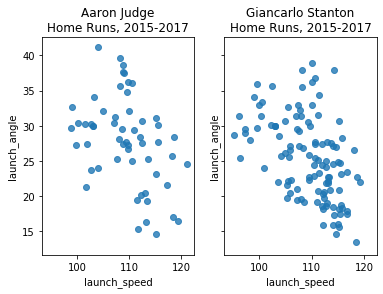

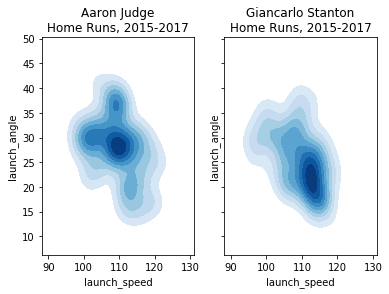

In [10]:
#Crear una figura con dos gráficos de dispersión de velocidad de lanzamiento vs. ángulo de lanzamiento, 
#uno por cada home run de cada jugador
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x=hr_judge['launch_speed'], y=hr_judge['launch_angle'], fit_reg=False, color='tab:blue', ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x=hr_stanton['launch_speed'], y=hr_stanton['launch_angle'], fit_reg=False, color='tab:blue', ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')
plt.show()

# Crear una figura con dos gráficos KDE de velocidad de lanzamiento vs. ángulo de lanzamiento
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(hr_judge['launch_speed'], hr_judge['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(hr_stanton['launch_speed'], hr_stanton['launch_angle'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')
plt.show()

##  5. Home runs por velocidad de lanzamiento
<p>Parece que Stanton golpea sus <em>home runs</em> un poco más bajo y un poco más duro que Judge, aunque esto debe interpretarse como un grano de sal dado el pequeño tamaño de la muestra de <em>home runs</em>.</p>
<p>Statcast no solo mide la velocidad de la bola que sale del bate, sino que mide la velocidad de la bola que sale de la mano del lanzador y comienza su viaje hacia el plato. Podemos usar estos datos para comparar los <em>home runs</em> de Stanton y Judge en términos de velocidad de lanzamiento. A continuación, encontrará diagramas de cajas que muestran los resúmenes de cinco números para cada jugador: mínimo, primer cuartil, mediana, tercer cuartil y máximo.</p>

In [11]:
# Combinar los DataFrames Judge y Stanton para graficar fácilmente los diagramas de caja y bigotes.
hr_judge_stanton = pd.concat([hr_judge, hr_stanton])
display(hr_judge_stanton.head())
display(hr_judge_stanton.tail())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
8,FT,2017-09-30,93.1,-1.4675,5.3552,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (52) on a fly ball to left ...,R,R,R,NYY,TOR,X,NaN,fly_ball,2,0,2017,-1.4279,0.3261,-0.4320,2.9955,NaN,NaN,NaN,0,4,Bot,56.86,4.52,NaN,NaN,431145.0,NaN,170930_180303,5.7047,-135.4206,-1.0399,-18.6301,26.9148,-28.1807,3.8271,1.6673,484.0,118.3,25.740,92.992,2312.0,6.040,492513,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.4579,0.983,1.951,2.0,1.0,0.0,3.0,6.0,23,3
50,FF,2017-09-28,91.4,-1.2834,6.5190,Aaron Judge,592450,607188,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Aaron Judge homers (51) on a fly ball to right...,R,R,R,NYY,TB,X,NaN,fly_ball,2,2,2017,-0.4642,1.6500,-0.0851,2.6020,NaN,NaN,NaN,0,1,Bot,223.58,82.88,NaN,NaN,467092.0,NaN,170928_232325,3.9497,-132.6375,-7.3630,-6.2249,28.1393,-11.7031,3.8278,1.6679,357.0,104.1,41.131,90.457,2220.0,5.838,492483,607188.0,467092.0,446263.0,621002.0,446334.0,588751.0,527049.0,488721.0,605480.0,54.6596,0.337,0.640,2.0,1.0,0.0,3.0,5.0,7,5
102,CH,2017-09-25,84.3,-2.1259,6.1178,Aaron Judge,592450,502239,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,Aaron Judge homers (50) on a fly ball to left ...,R,R,R,NYY,KC,X,NaN,fly_ball,2,1,2017,-1.1677,0.3197,-0.4138,2.3448,NaN,NaN,NaN,2,7,Bot,57.47,39.95,NaN,NaN,521692.0,NaN,170925_192018,6.3096,-122.6568,-3.1191,-13.0269,21.2326,-28.5495,3.8282,1.6684,408.0,109.6,34.853,84.965,1328.0,6.443,490806,502239.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.0549,0.928,1.840,2.0,1.0,0.0,3.0,6.0,57,4
110,FF,2017-09-25,93.0,-2.5921,5.8090,Aaron Judge,592450,596001,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,2.0,Aaron Judge homers (49) on a fly ball to right...,R,R,R,NYY,KC,X,NaN,fly_ball,3,2,2017,-0.8073,1.7389,-0.0837,3.4372,NaN,NaN,458731.0,1,3,Bot,205.50,42.47,NaN,NaN,521692.0,NaN,170925_175250,8.0487,-134.8087,-3.9271,-11.4310,29.8617,-10.7700,3.8273,1.6674,389.0,107.3,31.263,91.784,2117.0,5.805,490806,596001.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.6921,0.935,1.855,2.0,1.0,0.0,3.0,6.0,20,6
124,SI,2017-09-24,96.5,-2.2724,6.0514,Aaron Judge,592450,572193,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,11.0,Aaron Judge homers (48) on a fly ball to left ...,R,R,R,TOR,NYY,X,NaN,fly_ball,0,0,2017,-1.2132,1.3761,-0.8306,3.2717,NaN,NaN,452104.0,1,7,Top,66.52,44.37,NaN,NaN,431145.0,NaN,170924_194510,6.5044,-140.0805,-4.8844,-17.2693,30.0049,-13.3370,3.8166,1.6557,391.0,98.9,29.746,96.090,2075.0,6.069,492427,572193.0,431145.0,475253.0,446381.0,518626.0,572365.0,606192.0,607680.0,430832.0,54.4331,0.513,0.938,2.0,1.0,0.0,3.0,6.0,63,1


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
5589,SL,2015-04-25,81.1,-2.0034,5.6356,Giancarlo Stanton,519317,514669,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (5) on a fly ball to ...,R,R,R,MIA,WSH,X,NaN,fly_ball,2,2,2015,0.997250,0.353367,-0.011,1.863,NaN,NaN,NaN,0,8,Bot,75.78,34.52,NaN,NaN,467092.0,NaN,150425_183133,2.422,-118.087,-0.622,11.275,25.373,-30.608,3.77,1.73,415.0,107.9,31.439,78.803,NaN,5.114,413914,514669.0,467092.0,475582.0,457787.0,488862.0,435622.0,150029.0,547180.0,407862.0,55.3827,0.952,1.893,2.0,1.0,0.0,3.0,6.0,61,10
5627,FF,2015-04-23,91.8,-2.3701,5.7473,Giancarlo Stanton,519317,518603,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,13.0,Giancarlo Stanton homers (4) on a line drive t...,R,R,R,PHI,MIA,X,NaN,line_drive,3,2,2015,-1.205758,1.292200,-0.935,2.535,NaN,445988.0,NaN,1,6,Top,40.88,83.02,NaN,NaN,519237.0,NaN,150423_145723,5.900,-133.586,-4.027,-13.695,34.070,-18.600,3.71,1.71,377.0,118.5,13.478,90.825,1937.0,6.250,413880,518603.0,519237.0,573131.0,514917.0,605125.0,433217.0,519184.0,546318.0,425796.0,54.2474,0.814,1.306,2.0,1.0,0.0,3.0,6.0,49,7
5675,FC,2015-04-21,85.5,-2.2315,5.9105,Giancarlo Stanton,519317,425532,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,6.0,Giancarlo Stanton homers (3) on a line drive t...,R,R,R,PHI,MIA,X,NaN,line_drive,3,2,2015,-0.033975,0.503867,0.798,3.013,NaN,NaN,NaN,1,4,Top,173.77,11.51,NaN,NaN,434563.0,NaN,150421_195818,6.589,-124.405,-1.023,1.089,23.180,-28.751,3.77,1.71,449.0,113.1,22.689,84.021,NaN,5.292,413851,425532.0,434563.0,429667.0,400284.0,605125.0,520471.0,519184.0,546318.0,429713.0,55.2061,0.996,1.947,2.0,1.0,0.0,3.0,6.0,25,7
5735,FT,2015-04-17,90.4,-1.4871,5.9198,Giancarlo Stanton,519317,112526,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,6.0,Giancarlo Stanton homers (2) on a line drive t...,R,R,R,NYM,MIA,X,NaN,line_drive,0,2,2015,-1.532800,0.539700,0.503,2.663,NaN,NaN,NaN,2,1,Top,176.31,39.64,NaN,NaN,489232.0,NaN,150417_191502,7.314,-131.500,-1.998,-17.474,30.451,-27.997,3.70,1.68,381.0,103.7,28.498,88.300,2172.0,5.470,413797,112526.0,489232.0,446263.0,502517.0,493472.0,527038.0,150212.0,501571.0,434158.0,55.0300,0.876,1.690,2.0,1.0,0.0,3.0,6.0,3,3
5749,FT,2015-04-16,92.0,-2.1797,5.8636,Giancarlo Stanton,519317,518716,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (1) on a fly ball to ...,R,R,R,NYM,MIA,X,NaN,fly_ball,3,2,2015,-1.440950,0.761867,-0.131,2.800,NaN,592885.0,NaN,1,1,Top,178.86,37.61,NaN,NaN,518595.0,NaN,150416_192005,7.421,-133.877,-2.269,-16.989,30.511,-25.030,3.58,1.58,396.0,104.8,26.092,90.834,2222.0,5.919,413785,518716.0,518595.0,446263.0,502517.0,493472.0,527038.0,150212.0,501571.0,434158.0,54.5816,0.920,1.759,2.0,1.0,0.0,3.0,6.0,3,8


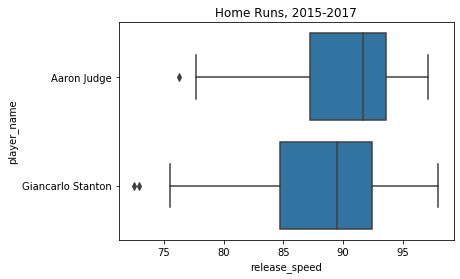

In [12]:
# Crear un diagrama de caja y bigotes que describa la velocidad de lanzamiento para los home runs de cada jugador
a = sns.boxplot(x='release_speed', y='player_name', data=hr_judge_stanton, color='tab:blue').set_title('Home Runs, 2015-2017')

## 6. Home runs por locación de lanzamiento (1)
<p> Entonces, Judge parece acertar sus <em>home runs</em> con lanzamientos más rápidos que Stanton. Podríamos llamar a Judge un bateador de bola rápida. Stanton parece agnóstico a la velocidad de lanzamiento y al probable movimiento de lanzamiento, ya que los lanzamientos más lentos (por ejemplo, bolas curvas, deslizadores y cambios) tienden a tener más descanso. Statcast <em>sí</em> rastrea el movimiento de lanzamiento y el tipo, pero avancemos con algo más: <strong>ubicación de lanzamiento</strong>. Statcast rastrea la zona en la que se encuentra el lanzamiento cuando cruza la placa de bateo. La numeración de la zona se ve así (desde el punto de vista del receptor):</p>
<p><img style="margin:5px 20px 5px 1px; width:20%;" src="UL.jpg"></p>
<p>Podemos trazar esto usando un histograma 2D. Para simplificar, solo veamos los golpes, lo que nos da una cuadrícula de 9x9. Podemos ver cada zona como coordenadas en un diagrama 2D, siendo la esquina inferior izquierda (1,1) y la esquina superior derecha (3,3). Configuremos una función para asignar coordenadas-x a cada golpe.</p>

In [13]:
def asignar_x_coord(row):
    """
    Asignar una coordenada-x a los números de zona de golpe de Statcast. Las zonas 11, 12, 13,
    y 14 son ignoradas para simplicidad del gráfico."""
    
    # Tercio izquierdo de la zona de bateo
    if row.zone in [1, 4, 7]:
        return 1
    # Tercio medio de la zona de bateo
    if row.zone in [2, 5, 8]:
        return 2
    # Tercio derecho de la zona de bateo
    if row.zone in [3, 6, 9]:
        return 3

## 7. Home runs por locación de lanzamiento (2)
<p>Ahora hagamos lo mismo para las coordenadas-y</p>

In [14]:
def asignar_y_coord(row):
    """
    Asignar una coordenada-y a los números de zona de golpe de Statcast. Las zonas 11, 12, 13,
    y 14 son ignoradas para simplicidad del gráfico."""
    
    # Tercio superior de la zona de bateo
    if row.zone in [1, 2, 3]:
        return 3
    # Tercio medio de la zona de bateo
    if row.zone in [4, 5, 6]:
        return 2
    # Tercio inferior de la zona de bateo
    if row.zone in [7, 8, 9]:
        return 1

## 8. Zona de home runs de Aaron Judge

<p>Ahora aplicaremos las funciones que creamos y luego construiremos histogramas 2D. Primero, para Aaron Judge (nuevamente, para lanzamientos en la zona de bateo que resultaron en <em>home runs</em>).</p>

In [15]:
# Se ignorarán las zonas 11, 12, 13, y 14 por simplicidad del gráfico
hr_bateo_judge = hr_judge.copy().loc[hr_judge.zone <= 9]
display(hr_bateo_judge.head())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
8,FT,2017-09-30,93.1,-1.4675,5.3552,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (52) on a fly ball to left ...,R,R,R,NYY,TOR,X,NaN,fly_ball,2,0,2017,-1.4279,0.3261,-0.4320,2.9955,NaN,NaN,NaN,0,4,Bot,56.86,4.52,NaN,NaN,431145.0,NaN,170930_180303,5.7047,-135.4206,-1.0399,-18.6301,26.9148,-28.1807,3.8271,1.6673,484.0,118.3,25.740,92.992,2312.0,6.040,492513,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.4579,0.983,1.951,2.0,1.0,0.0,3.0,6.0,23,3
50,FF,2017-09-28,91.4,-1.2834,6.5190,Aaron Judge,592450,607188,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Aaron Judge homers (51) on a fly ball to right...,R,R,R,NYY,TB,X,NaN,fly_ball,2,2,2017,-0.4642,1.6500,-0.0851,2.6020,NaN,NaN,NaN,0,1,Bot,223.58,82.88,NaN,NaN,467092.0,NaN,170928_232325,3.9497,-132.6375,-7.3630,-6.2249,28.1393,-11.7031,3.8278,1.6679,357.0,104.1,41.131,90.457,2220.0,5.838,492483,607188.0,467092.0,446263.0,621002.0,446334.0,588751.0,527049.0,488721.0,605480.0,54.6596,0.337,0.640,2.0,1.0,0.0,3.0,5.0,7,5
102,CH,2017-09-25,84.3,-2.1259,6.1178,Aaron Judge,592450,502239,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,Aaron Judge homers (50) on a fly ball to left ...,R,R,R,NYY,KC,X,NaN,fly_ball,2,1,2017,-1.1677,0.3197,-0.4138,2.3448,NaN,NaN,NaN,2,7,Bot,57.47,39.95,NaN,NaN,521692.0,NaN,170925_192018,6.3096,-122.6568,-3.1191,-13.0269,21.2326,-28.5495,3.8282,1.6684,408.0,109.6,34.853,84.965,1328.0,6.443,490806,502239.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.0549,0.928,1.840,2.0,1.0,0.0,3.0,6.0,57,4
110,FF,2017-09-25,93.0,-2.5921,5.8090,Aaron Judge,592450,596001,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,2.0,Aaron Judge homers (49) on a fly ball to right...,R,R,R,NYY,KC,X,NaN,fly_ball,3,2,2017,-0.8073,1.7389,-0.0837,3.4372,NaN,NaN,458731.0,1,3,Bot,205.50,42.47,NaN,NaN,521692.0,NaN,170925_175250,8.0487,-134.8087,-3.9271,-11.4310,29.8617,-10.7700,3.8273,1.6674,389.0,107.3,31.263,91.784,2117.0,5.805,490806,596001.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.6921,0.935,1.855,2.0,1.0,0.0,3.0,6.0,20,6
125,FT,2017-09-24,93.0,-1.6915,5.2244,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Aaron Judge hits a home run (47).,R,R,R,TOR,NYY,X,NaN,line_drive,3,2,2017,-0.7011,-0.0597,-0.1824,2.2377,NaN,NaN,NaN,0,6,Top,32.23,68.11,NaN,NaN,431145.0,NaN,170924_191122,5.3529,-135.2444,-1.8215,-9.6144,25.4991,-32.7608,3.8157,1.6547,378.0,113.1,20.531,93.089,2216.0,6.073,492427,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,606192.0,607680.0,430832.0,54.4290,0.971,1.818,2.0,1.0,0.0,3.0,6.0,51,6


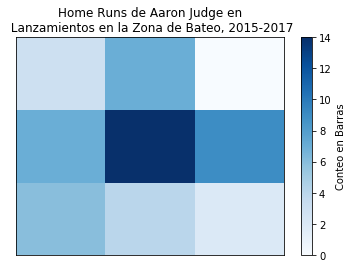

In [16]:
# Asignar las coordenadas cartesianas para los lanzamientos en la zona de bateo de los home runs de Judge
hr_bateo_judge['zone_x'] = hr_bateo_judge.apply(asignar_x_coord, axis=1)
hr_bateo_judge['zone_y'] = hr_bateo_judge.apply(asignar_y_coord, axis=1)

# Graficar la zona de home runs de Judge como un histograma 2D con una barra de color
plt.hist2d(hr_bateo_judge.zone_x, hr_bateo_judge.zone_y, bins=3, cmap='Blues')
plt.title('Home Runs de Aaron Judge en\n Lanzamientos en la Zona de Bateo, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Conteo en Barras')
plt.show()

## 9. Zona de home runs de Giancarlo Stanton
<p>Ahora hagamos lo mismo para Giancarlo Stanton</p>

In [17]:
# Se ignorarán las zonas 11, 12, 13, y 14 por simplicidad del gráfico
hr_bateo_stanton = hr_stanton.copy().loc[hr_stanton.zone <= 9]
display(hr_bateo_stanton.head())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
54,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (59) on a fly ball to...,R,R,L,MIA,ATL,X,NaN,fly_ball,0,0,2017,-0.1303,-0.2101,-0.1993,2.2053,NaN,NaN,543829.0,2,8,Bot,1.00,46.59,NaN,NaN,452095.0,NaN,170929_020346,-5.2404,-130.1155,-3.2799,-0.5507,22.3877,-34.1660,3.6318,1.6020,467.0,118.7,22.736,88.690,2173.0,5.433,492474,571521.0,452095.0,518692.0,645277.0,611177.0,621020.0,572669.0,542255.0,455976.0,55.0652,0.982,1.948,2.0,1.0,0.0,3.0,6.0,68,1
60,CU,2017-09-28,72.5,-1.9953,5.1623,Giancarlo Stanton,519317,527054,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (58) on a fly ball to...,R,R,R,MIA,ATL,X,NaN,fly_ball,0,0,2017,1.2631,-0.3950,0.2128,2.1402,NaN,NaN,NaN,2,4,Bot,59.24,32.39,NaN,NaN,452095.0,NaN,170929_004604,2.2895,-105.2166,2.0929,8.5944,20.1215,-35.6884,3.6324,1.6027,422.0,109.2,30.584,70.953,2694.0,5.518,492474,527054.0,452095.0,518692.0,645277.0,611177.0,621020.0,572669.0,542255.0,455976.0,54.9802,0.968,1.927,2.0,1.0,0.0,3.0,6.0,36,1
146,CU,2017-09-23,76.1,-1.7136,6.5838,Giancarlo Stanton,519317,592836,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (57) on a line drive ...,R,R,R,ARI,MIA,X,NaN,line_drive,1,1,2017,0.9149,-0.7410,0.1186,2.1204,NaN,NaN,NaN,2,4,Top,50.52,37.41,NaN,NaN,NaN,NaN,170924_013612,2.2277,-110.7218,-1.0562,6.9849,18.8187,-38.1983,3.4921,1.4627,419.0,116.7,17.908,75.331,2263.0,5.623,492410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.8767,0.853,1.456,2.0,1.0,0.0,3.0,6.0,36,3
184,CU,2017-09-20,78.2,-1.3916,6.0983,Giancarlo Stanton,519317,592340,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (56) on a line drive ...,R,R,R,MIA,NYM,X,NaN,line_drive,1,1,2017,0.7291,-0.9380,0.1461,2.4083,NaN,NaN,543829.0,1,8,Bot,50.63,47.10,NaN,NaN,608700.0,NaN,170920_193537,1.9812,-113.5555,0.6901,5.7138,23.5274,-40.4715,3.6325,1.6027,399.0,116.7,17.422,76.915,2221.0,5.777,492373,592340.0,608700.0,642086.0,595943.0,452678.0,408314.0,607043.0,493114.0,607369.0,54.7213,0.822,1.347,2.0,1.0,0.0,3.0,6.0,68,3
238,SL,2017-09-18,89.5,-1.4171,5.7694,Giancarlo Stanton,519317,518774,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Giancarlo Stanton homers (55) on a line drive ...,R,R,R,MIA,NYM,X,NaN,line_drive,1,0,2017,0.4057,-0.0223,-0.3812,2.9884,NaN,543829.0,542513.0,0,4,Bot,100.92,6.98,NaN,NaN,518595.0,NaN,170919_004101,1.7093,-130.3502,-0.9286,4.3673,22.6890,-32.4514,3.6560,1.6770,455.0,114.2,17.321,90.126,2284.0,6.238,492346,518774.0,518595.0,642086.0,608325.0,452678.0,408314.0,607043.0,501571.0,493114.0,54.2601,0.881,1.331,2.0,1.0,0.0,3.0,6.0,39,2


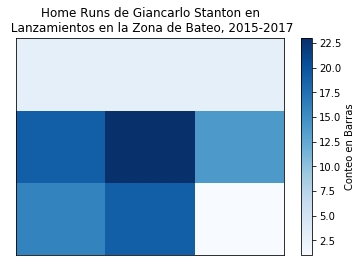

In [18]:
# Asignar las coordenadas cartesianas para los lanzamientos en la zona de bateo de los home runs de Stanton
hr_bateo_stanton['zone_x'] = hr_bateo_stanton.apply(asignar_x_coord, axis=1)
hr_bateo_stanton['zone_y'] = hr_bateo_stanton.apply(asignar_y_coord, axis=1)

# Graficar la zona de home runs de Judge como un histograma 2D con una barra de color
plt.hist2d(hr_bateo_stanton.zone_x, hr_bateo_stanton.zone_y, bins=3, cmap='Blues')
plt.title('Home Runs de Giancarlo Stanton en\n Lanzamientos en la Zona de Bateo, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Conteo en Barras')
plt.show()

## 10. ¿Deberían estar asustados los lanzadores contrarios?
<p> Algunas conclusiones: </p>
<ul>
    <li>Stanton no pega muchos <em>home runs</em> en lanzamientos en el tercio superior de la zona de strike. </li>
    <li>Como casi todos los bateadores, a ambos jugadores les encantan los lanzamientos en el centro horizontal y vertical del plato.</li>
    <li>El lanzamiento de <em>home runs</em> menos favorito del Judge parece estar a gran distancia, mientras que el de Stanton parece estar a poca distancia.</li>
    <li>Si tuviéramos que describir la zona de <em>home runs</em> de Stanton, sería en el medio. La zona de <em>home runs</em> del juez está mucho más extendida.</li>
</ul>
<p> La gran conclusión de todo este ejercicio: Aaron Judge y Giancarlo Stanton no son idénticos a pesar de sus similitudes superficiales. En términos de <em>home runs</em>, sus perfiles de lanzamiento, así como su velocidad de lanzamiento y preferencias de ubicación, son diferentes.</p>
<p>¿Deberían estar asustados los lanzadores opuestos?</p>

In [19]:
R = 'Si'
print('¿Deberían estar asustados?\n' + R)

¿Deberían estar asustados?
Si
